# Fully connected neural networks (MLP)

In [1]:
import torch
from torch import nn, optim
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
#For GPU stuff
import torch
import torchvisio n
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F

# Loading the Dataset

## Architecture

In [3]:
class MLP(nn.Module):
    '''
    Multilayer Perceptron.
    '''
    def __init__(self, 
                 #n_hidden_layers=1, 
                 use_batchnorm=False, 
                 use_xavier=False):
        super().__init__()
        #dims = np.linspace(32 * 32 * 3, 10, n_hidden_layers + 2, dtype=int)
        n_hidden_layers = 3
        dims = np.array([28 * 28,400,300,120,10])
        #Hidden layers
        modules = [nn.Flatten()]
        for i in range(n_hidden_layers):
            modules.append(nn.Linear(dims[i], dims[i+1]))
            if use_batchnorm:
                modules.append(nn.BatchNorm1d(dims[i+1]))
            modules.append(nn.ReLU())
            
        #Last layer
        modules.append(nn.Linear(dims[-2], dims[-1]))
        modules.append(torch.nn.Softmax())
        
        #Concatenate
        self.layers = nn.Sequential(*modules)
        
        #Initialize weights
        if use_xavier:
            self.layers.apply(self.init_weights)
        
    def forward(self, x):
        '''Forward pass'''
        return self.layers(x)
    
    def init_weights(self, m):
        if isinstance(m, nn.Linear):
            torch.nn.init.xavier_normal_(m.weight)
            m.bias.data.fill_(0.01)

## Training

In [4]:
#High level inputs
use_gpu         = True
seed            = 0

#Training inputs
batch_size      = 32
n_epochs        = 12
step_size       = 0.01
momentum        = 0.9

#Network architecture inputs
n_hidden_layers = 0
use_batchnorm   = False
use_xavier      = False
net             = MLP(use_batchnorm, use_xavier)

#Visualization inputs
show_loss_every = 100

In [5]:
#Set the seed
np.random.seed(seed)
torch.manual_seed(seed)

In [6]:
# transform to normalize the data
batch_size = 32
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])

# Download and load the training data
trainset = datasets.FashionMNIST('./data', download=True, train=True, transform=transform)
trainloader = DataLoader(trainset, batch_size=batch_size, shuffle=True)

# Download and load the test data
validationset = datasets.FashionMNIST('./data', download=True, train=False, transform=transform)
testloader = DataLoader(validationset, batch_size=batch_size, shuffle=True)

classes = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle Boot']



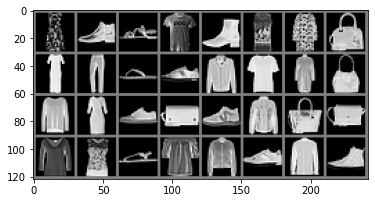

T-shirt/top
Trouser
Pullover
Dress
Coat
Sandal
Shirt
Sneaker
Bag
Ankle Boot


In [7]:
#Display some images

# function to show an image
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))

# print labels
for a in classes:
    print(a)

In [8]:
def train(net, n_epochs, trainloader, use_gpu, step_size, momentum, show_loss_every):
    if use_gpu:
        print('using GPU')
        net = net.cuda()

    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(net.parameters(), lr=step_size, momentum=momentum)

    for epoch in range(n_epochs):  # loop over the dataset multiple times

        running_loss = 0.0
        for i, data in enumerate(trainloader, 0):
            # get the inputs; data is a list of [inputs, labels]
            inputs, labels = data
            if use_gpu:
                inputs = inputs.cuda()
                labels = labels.cuda()

            # zero the parameter gradients
            optimizer.zero_grad()

            # forward + backward + optimize
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            loss.backward()  #Actually calculate gradient
            optimizer.step() #Update the weights

            # print statistics
            running_loss += loss.item()
            if (i+1) % show_loss_every == 0:    # print every show_loss_every mini-batches
                print('[%d, %5d] loss: %.3f' %
                      (epoch + 1, i + 1, running_loss / show_loss_every))
                running_loss = 0.0
                
    return net

In [9]:
#Calculate test error
def test(net, testloader, use_gpu):
    net.eval()

    correct = 0
    total = 0
    # since we're not training, we don't need to calculate the gradients for our outputs
    with torch.no_grad():
        for data in testloader:
            #Load data
            images, labels = data
            if use_gpu:
                images = images.cuda()
                labels = labels.cuda()

            # calculate outputs by running images through the network
            outputs = net(images)

            # the class with the highest energy is what we choose as prediction
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    print('Accuracy of the network on the 10000 test images: %d %%' % (
        100 * correct / total))
    print('Accuracy of random guessing:                      %d %%' % (
        10))
    return


In [11]:
import time
st = time.time()
net = train(net, n_epochs, trainloader, use_gpu, step_size, momentum, show_loss_every)
test(net, testloader, use_gpu)
print(f"Total time for training = {time.time() - st}")

using GPU


/usr/local/lib/python3.7/dist-packages/torch/nn/modules/container.py:141: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


[1,   100] loss: 2.300
[1,   200] loss: 2.286
[1,   300] loss: 2.174
[1,   400] loss: 1.975
[1,   500] loss: 1.883
[1,   600] loss: 1.855
[1,   700] loss: 1.818
[1,   800] loss: 1.800
[1,   900] loss: 1.772
[1,  1000] loss: 1.776
[1,  1100] loss: 1.772
[1,  1200] loss: 1.752
[1,  1300] loss: 1.744
[1,  1400] loss: 1.751
[1,  1500] loss: 1.750
[1,  1600] loss: 1.752
[1,  1700] loss: 1.743
[1,  1800] loss: 1.743
[2,   100] loss: 1.733
[2,   200] loss: 1.732
[2,   300] loss: 1.735
[2,   400] loss: 1.736
[2,   500] loss: 1.715
[2,   600] loss: 1.726
[2,   700] loss: 1.741
[2,   800] loss: 1.714
[2,   900] loss: 1.673
[2,  1000] loss: 1.649
[2,  1100] loss: 1.663
[2,  1200] loss: 1.662
[2,  1300] loss: 1.651
[2,  1400] loss: 1.650
[2,  1500] loss: 1.645
[2,  1600] loss: 1.643
[2,  1700] loss: 1.644
[2,  1800] loss: 1.646
[3,   100] loss: 1.628
[3,   200] loss: 1.628
[3,   300] loss: 1.625
[3,   400] loss: 1.633
[3,   500] loss: 1.646
[3,   600] loss: 1.646
[3,   700] loss: 1.634
[3,   800] 

# Defining the Model Structure

In [15]:
model = MLP()
model_parameters = filter(lambda p: p.requires_grad, model.parameters())
params = sum([np.prod(p.size()) for p in model_parameters])
print(f"# of trainable paramters = {params}")

# of trainable paramters = 471630
